<a href="https://colab.research.google.com/github/sammed97/ML-Linear_Regression-Energy-Consumptions-for-Appliances/blob/main/ML_Capstone_Project_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data-driven prediction of energy use of appliances**

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

## **Importing required Libraries**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np   #Pandas and Numpy for data analysis
import seaborn as sns
import matplotlib.pyplot as plt  #seaborn and matplotlib for data visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# importing required metrices and models from 'Sklearn'
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# mounting the google dricve
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the dataset**

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/M4/Appliances Energy Prediction/data_application_energy.csv', parse_dates=['date'])

# **Understanding the Data**

Okay now we loaded the dataset. Now we will explore the dataset.

In [4]:
# We will explore first 5 observations
df.head()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0 2016-01-11 17:00:00          60      30  ...        5.3  13.275433  13.275433
1 2016-01-11 17:10:00          60      30  ...        5.2  18.606195  18.606195
2 2016-01-11 17:20:00          50      30  ...        5.1  28.642668  28.642668
3 2016-01-11 17:30:00          50      40  ...        5.0  45.410389  45.410389
4 2016-01-11 17:40:00          60      40  ...        4.9  10.084097  10.084097

[5 rows x 29 columns]

In [5]:
# We will explore last 5 observations
df.tail()

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
19730 2016-05-27 17:20:00         100       0  ...  13.333333  43.096812  43.096812
19731 2016-05-27 17:30:00          90       0  ...  13.300000  49.282940  49.282940
19732 2016-05-27 17:40:00         270      10  ...  13.266667  29.199117  29.199117
19733 2016-05-27 17:50:00         420      10  ...  13.233333   6.322784   6.322784
19734 2016-05-27 18:00:00         430      10  ...  13.200000  34.118851  34.118851

[5 rows x 29 columns]

In [6]:
# Making a copy of dataset 
df_copy= df.copy()

In [7]:
# Exploring the shape of our dataset
df.shape

(19735, 29)

Now we get to know that we have 19735 observations with 29 features.

In [8]:
# We will now try to explore some more details
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [9]:
# Looking for column names
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## We have following columns
1. date : time year-month-day hour:minute:second

2. lights : energy use of light fixtures in the house in Wh

3. T1 : Temperature in kitchen area, in Celsius

4. T2 : Temperature in living room area, in Celsius

5. T3 : Temperature in laundry room area

6. T4 : Temperature in office room, in Celsius

7. T5 : Temperature in bathroom, in Celsius

8. T6 : Temperature outside the building (north side), in Celsius

9. T7 : Temperature in ironing room, in Celsius

10. T8 : Temperature in teenager room 2, in Celsius

11. T9 : Temperature in parents’ room, in Celsius

12. T_out : Temperature outside (from Chievres weather station), in Celsius

13. Tdewpoint : (from Chievres weather station), Â°C

14. RH_1 : Humidity in kitchen area, in %

15. RH_2 : Humidity in living room area, in %

16. RH_3 : Humidity in laundry room area, in %

17. RH_4 : Humidity in office room, in %

18. RH_5 : Humidity in bathroom, in %

19. RH_6 : Humidity outside the building (north side), in %

20. RH_7 : Humidity in ironing room, in %

21. RH_8 : Humidity in teenager room 2, in %

22. RH_9 : Humidity in parents’ room, in %

23. RH_out :Humidity outside (from Chievres weather station), in %

24. Pressure : (from Chievres weather station), in mm Hg

25. Wind speed: (from Chievres weather station), in m/s

26. Visibility :(from Chievres weather station), in km

27. Rv1 :Random variable 1, non-dimensional

28. Rv2 :Random variable 2, non-dimensional

29. Appliances : Total energy used by appliances, in Wh

We have 28 independent variables and 1 dependent variable

**Appliances** - Total energy used by appliances(KWh) is our **Dependent** variable

In [10]:
df.describe()

Appliances        lights  ...           rv1           rv2
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      97.694958      3.801875  ...     24.988033     24.988033
std      102.524891      7.935988  ...     14.496634     14.496634
min       10.000000      0.000000  ...      0.005322      0.005322
25%       50.000000      0.000000  ...     12.497889     12.497889
50%       60.000000      0.000000  ...     24.897653     24.897653
75%      100.000000      0.000000  ...     37.583769     37.583769
max     1080.000000     70.000000  ...     49.996530     49.996530

[8 rows x 28 columns]

### **Looking for Null/Missing Values**

In [11]:
# Checking for any missing/null values in our dataset
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

We have 0 null/missing values in our dataset.

## **Checking for Duplicated Values**

In [12]:
# Checking for duplicate observations
df.duplicated().sum()

0

We have 0 duplicated observations in our dataset.

In [13]:
# converting all the column names to lower cases for ease of doing
df.columns= [x.lower() for x in df.columns]

In [14]:
# Setting the date column as index
df=df.set_index('date')

## **Outlier Detection**

In [15]:
df['appliances'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: appliances, dtype: float64

In [16]:
# Calculating 25th and 75th percentile
Q1 = np.percentile(df['appliances'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['appliances'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [17]:
IQR

50.0

In [18]:
# outlier detection
lower_outliers = Q1 - 1.5 * IQR
upper_outliers = Q3 + 1.5 * IQR

In [19]:
upper_outliers

175.0

In [20]:
len(df[df['appliances']>175])

2138

As we have 2138 rows as outliers we may loose important information so we are considering 0.1 % of top features 

In [21]:
# Sorting the dependent variable descending
sorted_appliances= df.sort_values('appliances', ascending=False)
sorted_appliances.head()

appliances  lights  ...        rv1        rv2
date                                     ...                      
2016-01-16 18:50:00        1080      30  ...  27.408521  27.408521
2016-01-21 18:50:00        1070      30  ...  11.735734  11.735734
2016-01-14 17:00:00         910       0  ...  18.937972  18.937972
2016-04-04 15:40:00         900       0  ...  15.105153  15.105153
2016-01-21 19:00:00         890      20  ...   3.221583   3.221583

[5 rows x 28 columns]

In [22]:
# Getting the index for top 0.1% features
len(sorted_appliances.head(len(sorted_appliances)//1000))

19

In [23]:
# Obtaining the threshold value for outlier removal
sorted_appliances.appliances[19]

790

## **Boxplot**

The number of the 1% top values of appliances load is 19 and they have power load higher than 790 Wh


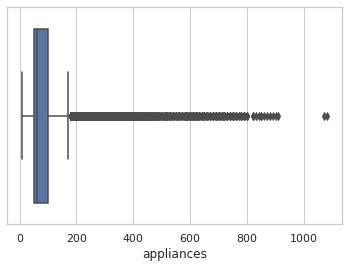

In [24]:
# Plotting the bloxplot for visualization of outliers
sorted_appliances = df.sort_values('appliances',ascending=False)
print("The number of the 1% top values of appliances load is",len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",sorted_appliances.appliances[19],"Wh")

sns.set(style='whitegrid')
ax= sns.boxplot(sorted_appliances.appliances)

**Dropping the features having energy consumption above 790 wh and below 0 wh**

In [25]:
df=df.dropna()
df=df.drop(df[(df.appliances > 790) | (df.appliances < 0)].index)

**Dependent variable plotting**

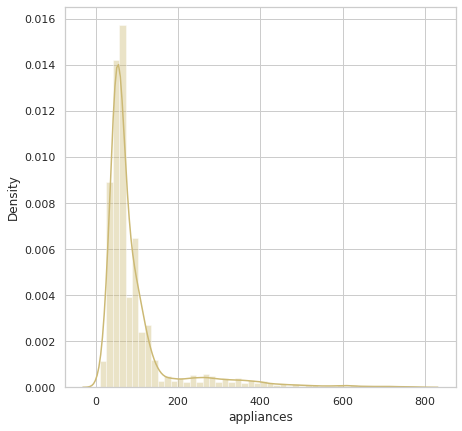

In [26]:
# Plotting the dependent variable
plt.figure(figsize=(7,7))
sns.distplot(df['appliances'],color="y")

**We will apply log transformation to make it a normal distribution**

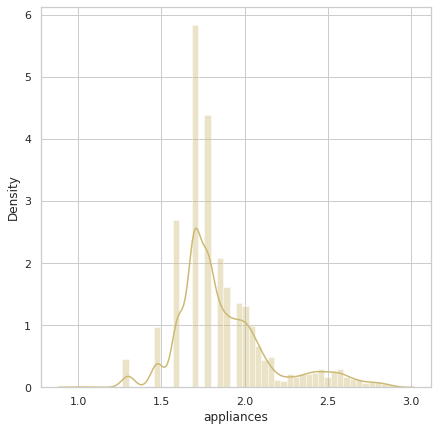

In [27]:
# Applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['appliances']),color="y")

We will plot histograms for all columns so that we can see how each variable is distributed

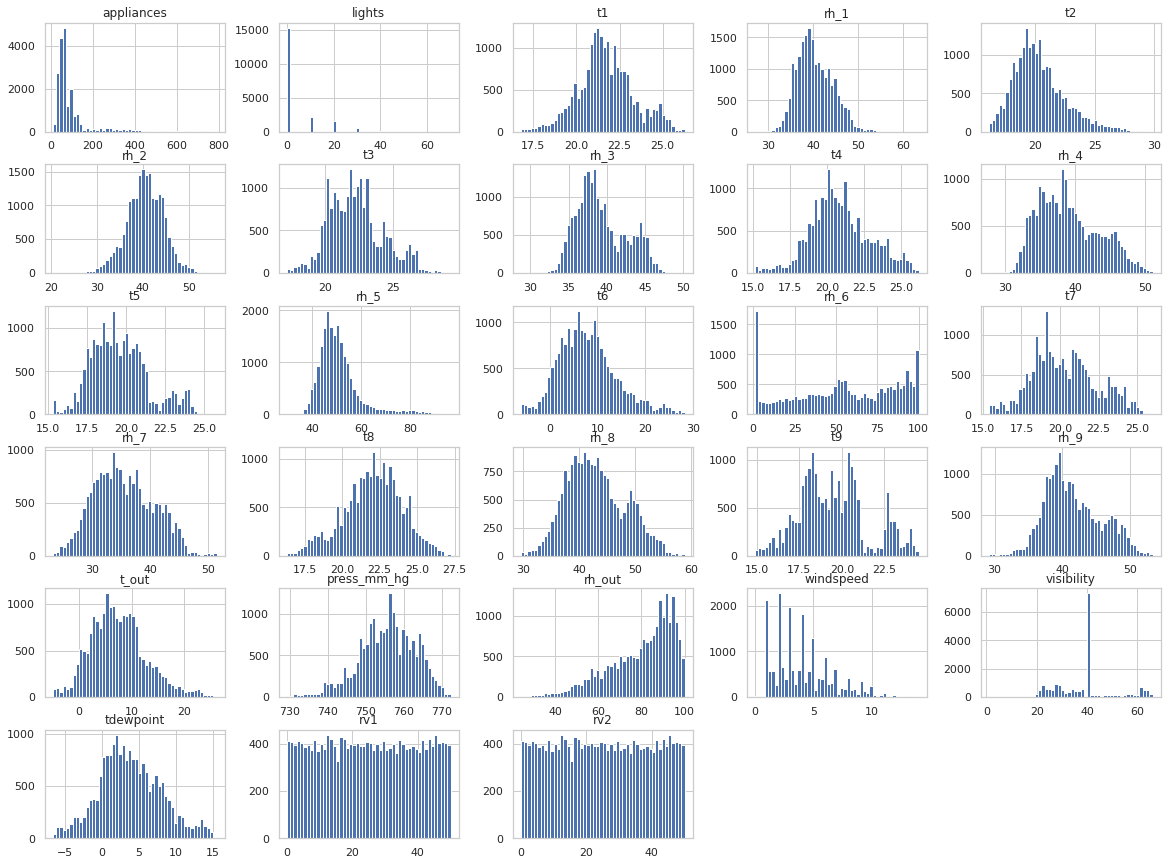

In [28]:
df.hist(bins=50, figsize=(20,15))
plt.savefig('attribute_histogram_plot')

**We will now create four different columns from date column 'hour', 'week',  'weekday' and 'month'**

In [29]:
# creating seperate column for date and time
df['hour']=df.index.hour
df['week']=df.index.week
df['weekday']=df.index.weekday
df['month']=df.index.month

## **Applying Log Transformation:-**
our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid.
*   It makes our skewed original data more normal.
*   It improves linearity between our dependent and independent variables.
*   It boosts validity of our statistical analyses.





 


We will create an extra column 'log_appliances' by applying log on our dependent variable.

In [30]:
# Applying log transformation to our dependent variable "appliances"
df['log_appliances']= np.log(df.appliances)

In [31]:
# calculating average temperature and humidity for hous
df['house_temp'] = ((df.t1 + df.t2 + df.t3 + df.t4 + df.t5 + df.t7 + df.t8 + df.t9)/8)
df['house_hum']=((df.rh_1 + df.rh_2 + df.rh_3 + df.rh_4 + df.rh_5 + df.rh_7 + df.rh_8 + df.rh_9)/8)

In [32]:
# We are taking product of several features to remove additional effects
df['t1rh1'] = df.t1 * df.rh_1
df['t2rh2'] = df.t2 * df.rh_2
df['t3rh3'] = df.t3 * df.rh_3
df['t4rh4'] = df.t4 * df.rh_4
df['t5rh5'] = df.t5 * df.rh_5
df['t6rh6'] = df.t6 * df.rh_6
df['t7rh7'] = df.t7 * df.rh_7
df['t8rh8'] = df.t8 * df.rh_8
df['t9rh9'] = df.t9 * df.rh_9
df['hour*lights'] = df.hour * df.lights

In [33]:
# defining a function for average energy consumption calculation
def mean_code(data, cat_feature, real_feat):
  '''
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature 
  '''
  return dict(data.groupby(cat_feature)[real_feat].mean())

In [34]:
# We are calculating average energy consumption for 'weekdays' and 'hourly' basis
df['weekday_avg']=list(map(mean_code(df[:],'weekday',"appliances").get,df.weekday))
df['hour_avg']=list(map(mean_code(df[:],'hour',"appliances").get,df.hour))

Using smaller data sets in 30 minitues and 1 hour basis instead of 10 minutes to reduce noice.

### **resample():-**
Resampling generates a unique sampling distribution on the basis of the actual data. We can apply various frequency to resample our time series data.

In [35]:
# Sampling dataset using 'resample' function
df_hour = df.resample('1H').mean()  # creating hourly basis sample
df_30_min = df.resample('30min').mean() #creating on '30 minutes' basis sample

In [36]:
# checking first 5 rows for hourly dataset
df_hour.head()

appliances     lights  ...  weekday_avg    hour_avg
date                                        ...                         
2016-01-11 17:00:00   55.000000  35.000000  ...   110.896974  158.812121
2016-01-11 18:00:00  176.666667  51.666667  ...   110.896974  187.426829
2016-01-11 19:00:00  173.333333  25.000000  ...   110.896974  141.256098
2016-01-11 20:00:00  125.000000  35.000000  ...   110.896974  126.982968
2016-01-11 21:00:00  103.333333  23.333333  ...   110.896974   96.496350

[5 rows x 47 columns]

In [37]:
# Checking first 5 rows for 30 mins datasets
df_30_min.head()

appliances     lights  ...  weekday_avg    hour_avg
date                                        ...                         
2016-01-11 17:00:00   56.666667  30.000000  ...   110.896974  158.812121
2016-01-11 17:30:00   53.333333  40.000000  ...   110.896974  158.812121
2016-01-11 18:00:00   60.000000  46.666667  ...   110.896974  187.426829
2016-01-11 18:30:00  293.333333  56.666667  ...   110.896974  187.426829
2016-01-11 19:00:00  260.000000  33.333333  ...   110.896974  141.256098

[5 rows x 47 columns]

In [38]:
# Importing standard deviation from statistics
from statistics import stdev

In [39]:
stdev(df_hour['appliances'])

79.7667030896885

In [40]:
stdev(df_30_min['appliances'])

89.63437351703367

### **Qualitative predictors**
We assume that we have low(high) energy load when the appliances consumption is lower(higher) than a given point of the hourly average counsumption. This point is dependent of data time frequency and the numbers below are set after tryouts based on appliances consumption standard deviation.

In [41]:
# Qualitative predictors
df_hour['low_consum'] = (df_hour.appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum'] = (df_hour.appliances+25>(df_hour.hour_avg))*1
df_30_min['low_consum']=(df_30_min.appliances+25<(df_30_min.hour_avg))*1
df_30_min['high_consum']=(df_30_min.appliances+35 >(df_30_min.hour_avg))*1
df['low_consum'] = (df.appliances+25<(df.hour_avg))*1
df['high_consum'] = (df.appliances+100>(df.hour_avg))*1

# **Data Visualization**

In [43]:
# defining functions for plotting various charts
def daily(x,df=df):
  '''
  it will groupby the x variable with weekday column resulting mean on that particular weekday
  '''
  return df.groupby('weekday')[x].mean()

def hourly(x,df=df):
  '''
  it will groupby the x variable with hour column resulting mean on that particular hour
  '''
  return df.groupby('hour')[x].mean()

def monthly_daily(x,df=df):
  '''
  it will be used for mean energy consumptions per weekday/month
  '''
  by_day = df.pivot_table(index='weekday',columns=['month'],values=x,aggfunc='mean')
  return round(by_day,ndigits=2)

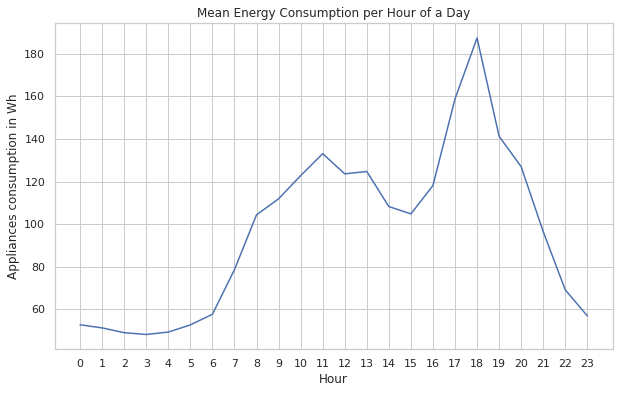

In [44]:
# Plotting hourly consumptions
hourly('appliances').plot(figsize=(10,6))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks= list(range(0,24,1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);




*   **We can clearly see that from 7 AM to 11 AM there is clear spike in energy 
consumption(from 80 wh to 135 wh), because in morning session we use lot of appliances for various purpose.**

*   **Then from 11 AM to 4 PM the energy consumption is ranges between 105 wh to 135 wh.**

*   **From 4 pm to 6 pm we can spot a sudden hike (from 120 wh to 185 wh) in energy consumption following by a sudden fall from 185 wh to 70 wh during 6 PM to 10 pm in night.**


*   **And then from 10 PM in night to 6 AM in the morning there is low energy consumption ranging from 50-60 wh as there is negligible use of energy or appliances.**









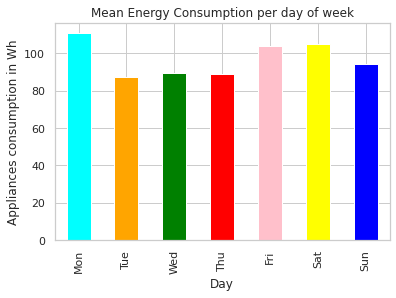

In [45]:
# weekly consumption

daily('appliances').plot(kind='bar',color=['cyan','orange','green','red','pink','yellow','blue'])
ticks= list(range(0,7,1))
labels= "Mon Tue Wed Thu Fri Sat Sun".split()
plt.xlabel('Day')
plt.ylabel('Appliances consumption in Wh')
plt.title('Mean Energy Consumption per day of week')
plt.xticks(ticks,labels);

The power load is a bit higher on **Monday**, **Friday**, **Saturday** and **Sunday** than the other days.

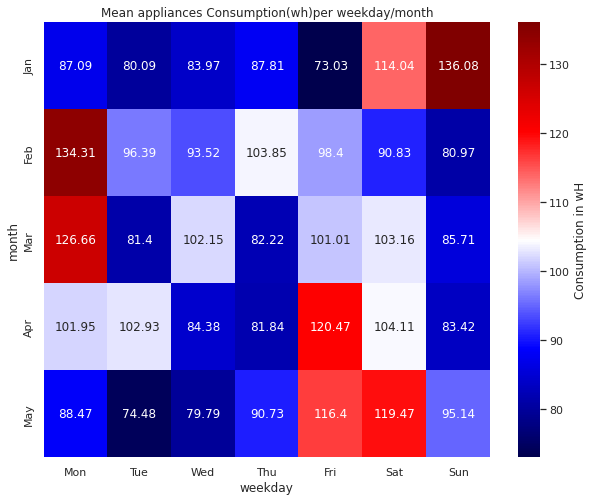

In [46]:
# Mean consumption of energy in given months across all days of week 
sns.set(rc={'figure.figsize':(10,8)})
ax=sns.heatmap(monthly_daily('appliances').T,cmap='seismic',xticklabels="Mon Tue Wed Thu Fri Sat Sun".split(),yticklabels="Jan Feb Mar Apr May".split(),annot=True,fmt='g',cbar_kws={'label':'Consumption in wH'}).set_title("Mean appliances Consumption(wh)per weekday/month")
plt.show()

In **January**, saturday and sundays have more energy consumption and Friday has lowest energy consumption.

In **February**, Monday and Thursday having high consumptions.

**March** has Monday and sataurday as high energy consumers with Tuesday as low consumer.

In **April**, Friday has more energy consumption and Thursday has the least.

In May Fridays and Sataurdays have highest consumption where Tuesdays has least consumption.

## **Identifying liner relationships**

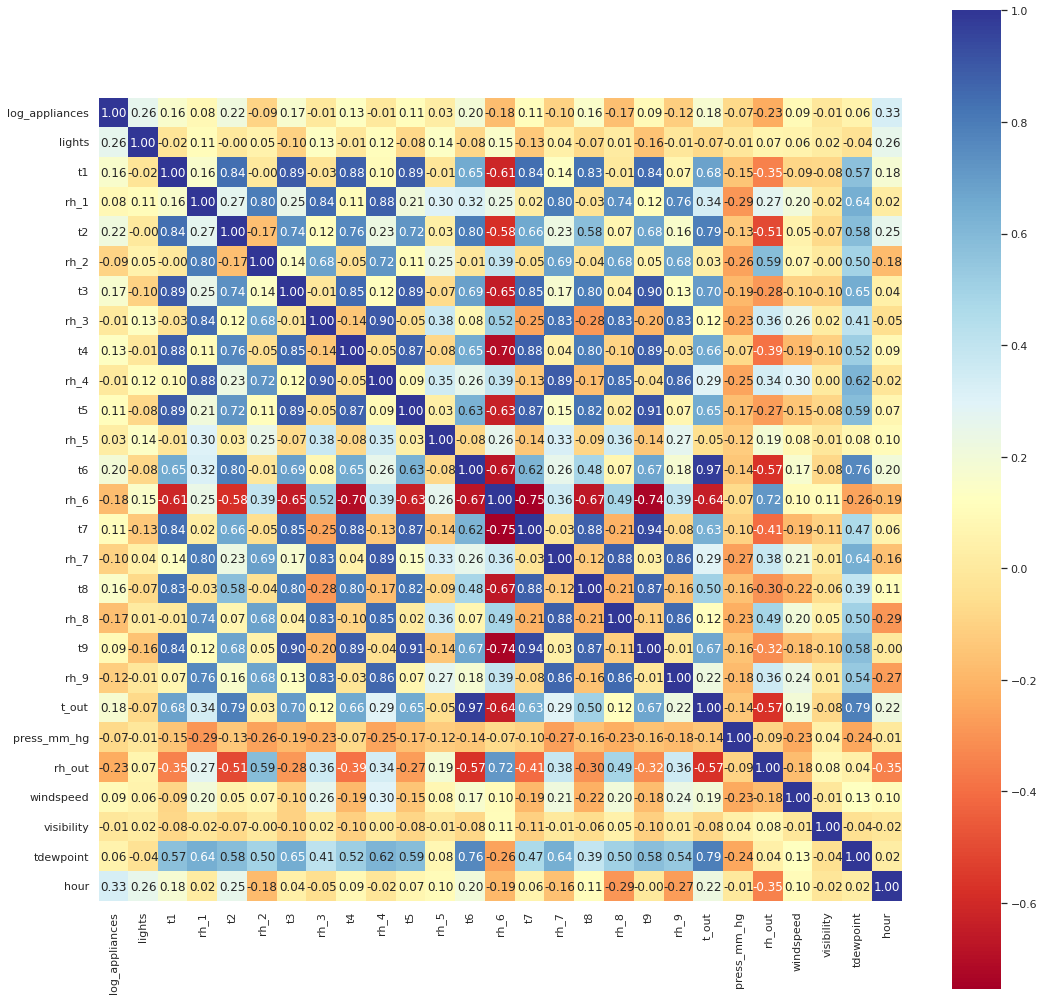

In [47]:
columns=['log_appliances','lights','t1','rh_1','t2','rh_2','t3','rh_3','t4','rh_4','t5','rh_5','t6','rh_6','t7','rh_7',
     't8','rh_8','t9','rh_9','t_out','press_mm_hg','rh_out','windspeed','visibility','tdewpoint','hour']
corr=df[columns].corr()
plt.figure(figsize=(18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar=True, annot=True, square=True, cmap='RdYlBu',fmt='.2f',xticklabels=columns,yticklabels=columns)
plt.show();

features that have high correlation with dependent variable(log_appliances)are hour, t_out, lights, t6, rh_6, t2, t3, rh_out, rh_8, windspeed

finding strong linear dependence between some variables that are showing dependency in heatmap

Now we will examine linear dependence between some basic features.
As we all know only linear independent variables are taken in consideration while doing the problem of linear regression.

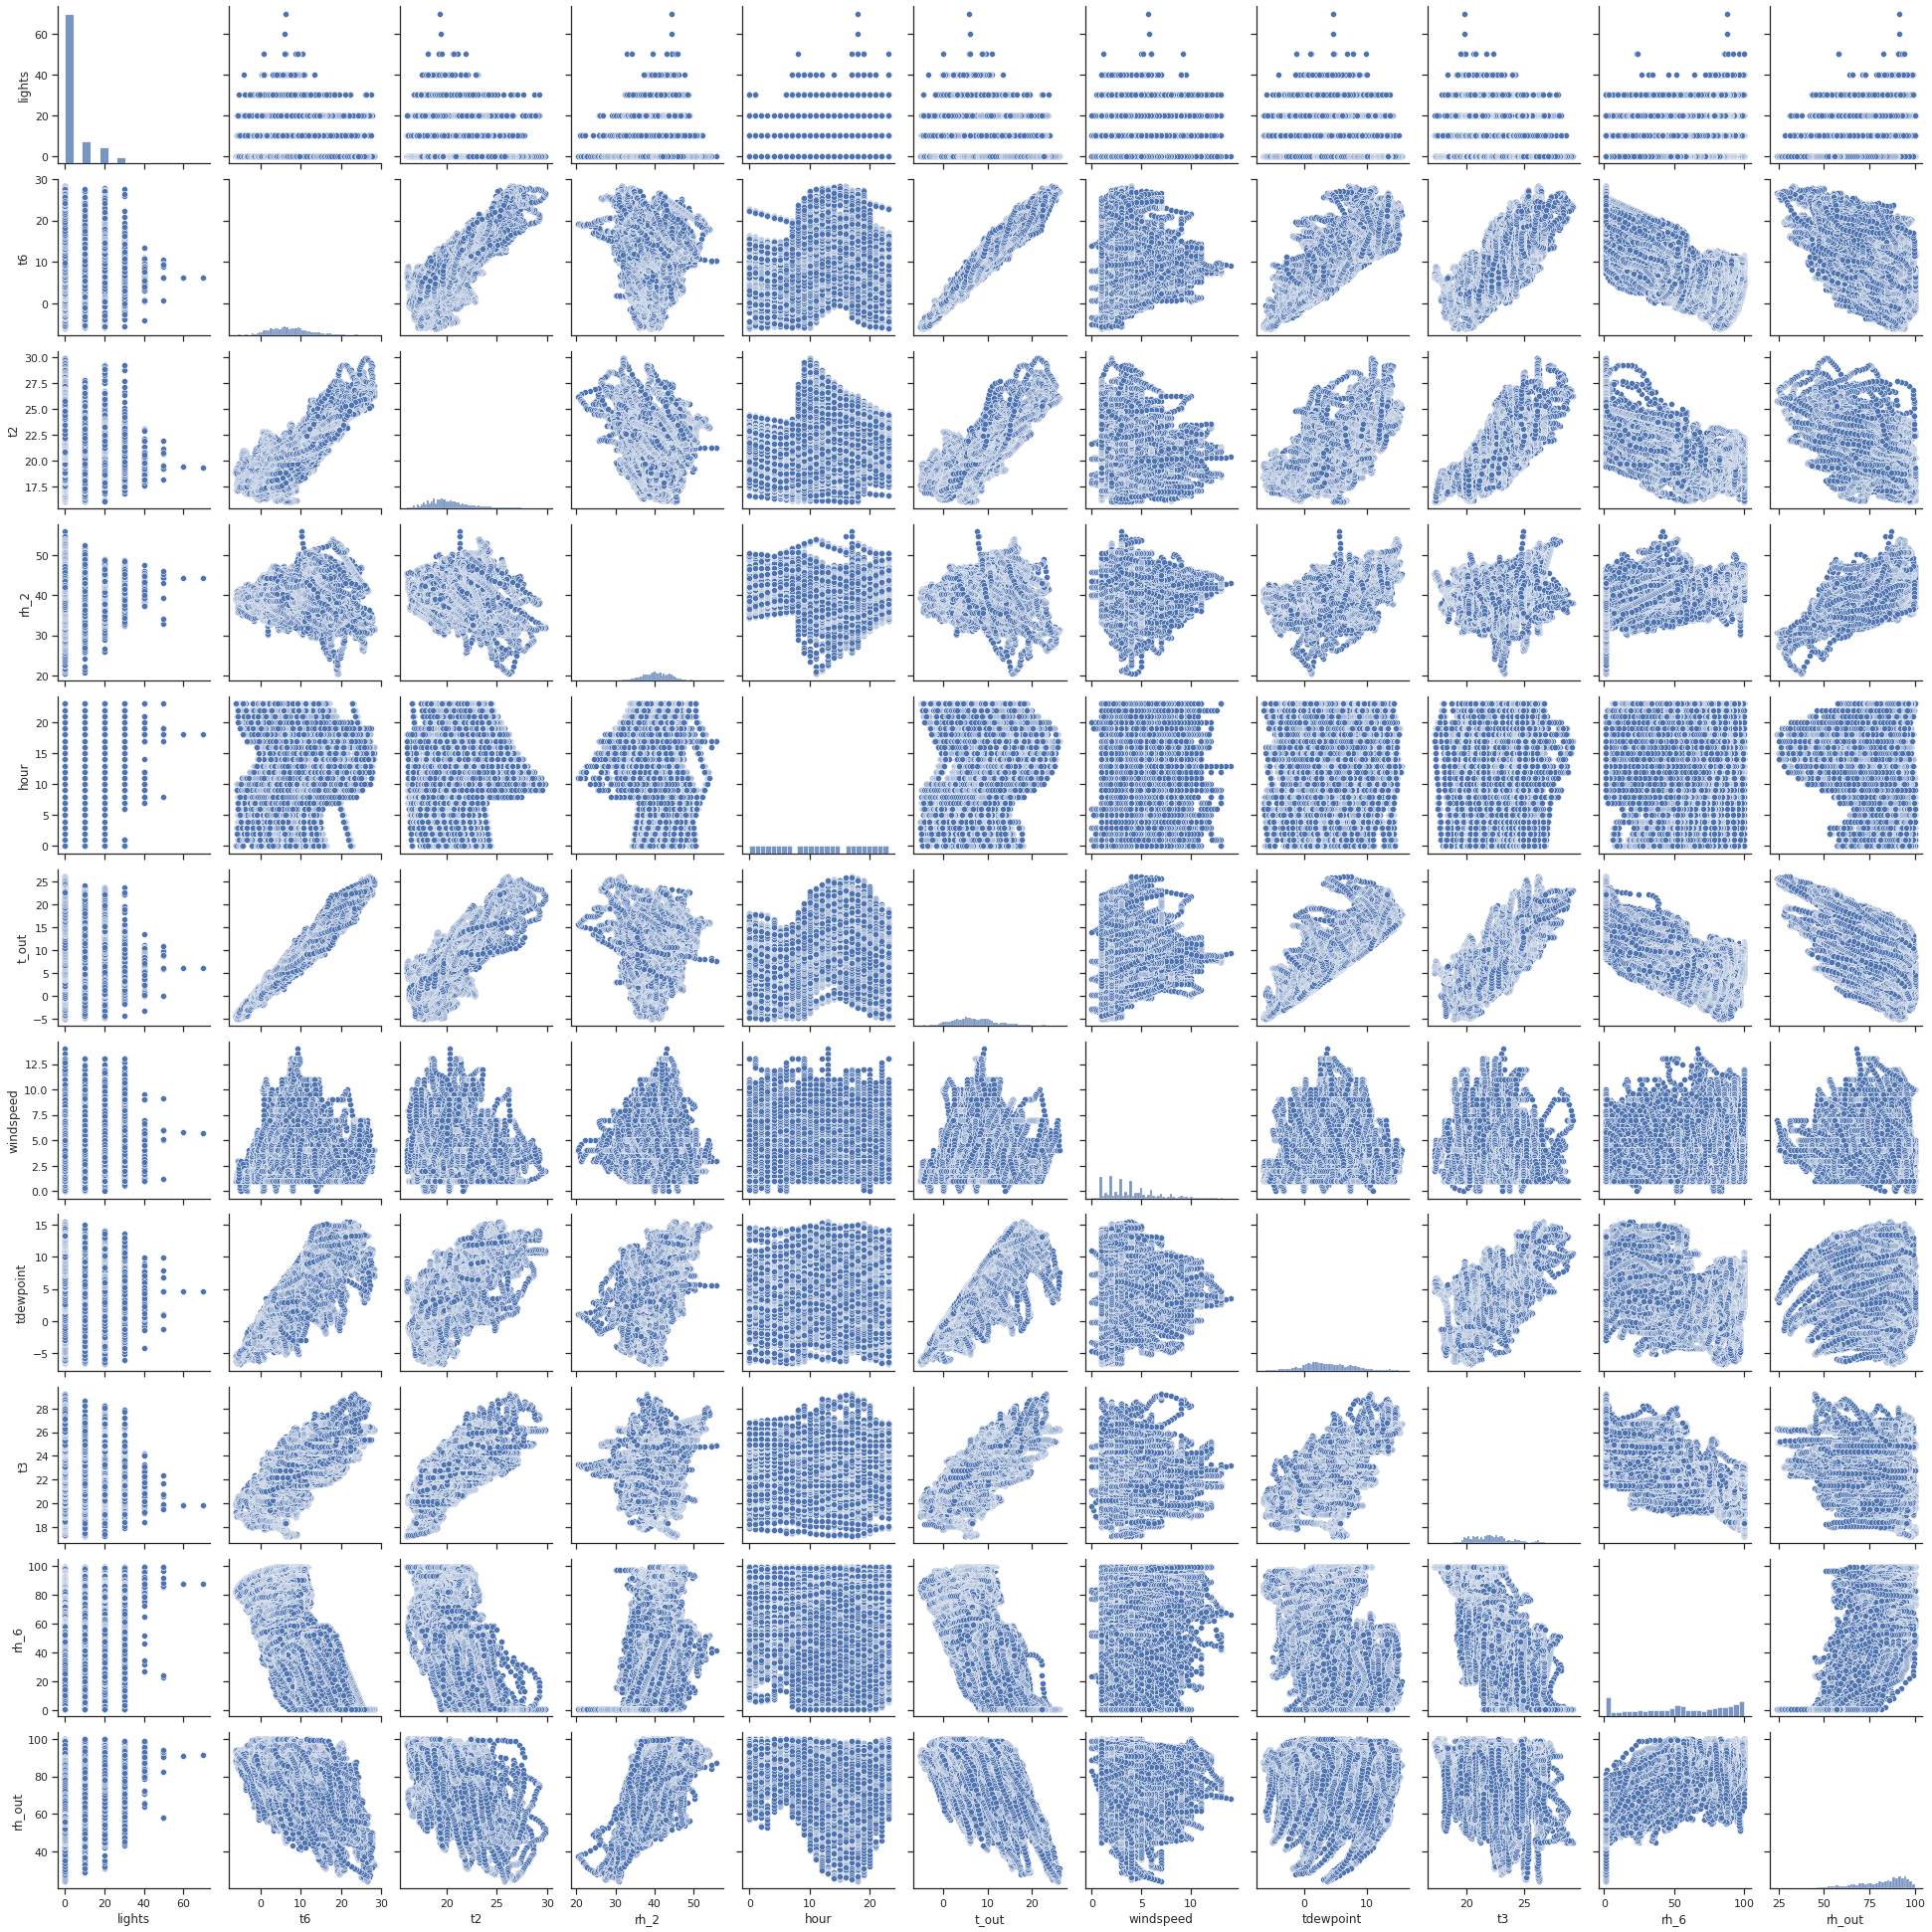

In [48]:
col=['lights','t6','t2','rh_2','hour','t_out','windspeed','tdewpoint','t3','rh_6','rh_out']
sns.set(style="ticks",color_codes=True)
sns.pairplot(df[col])
plt.show();

From above pairplot **'t_out'** has linear relationship with **'tdewpoint'**,   **'t2'**, **'t6'** so we are keeping only temperature outside the home **'t6'**.

Also **'t2'** has linear relationship with **'t6'**.

we will not use the following features **'t2'**, **'t3'**, **'rh_2'**, **'t_out'**,  **'tdewpoint'**

## **Training the model**

# **Linear Regression**

In [49]:
# Defining final features
model=['low_consum','high_consum','hour','lights','t6','rh_6','windspeed','t6rh6']

### **Transforming categorical variable into numerical variable**

In [50]:
# Transforming categorical variable into dummies ones
for cat_feature in ['weekday','hour']:
  df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])],axis=1)
  df_30_min= pd.concat([df_30_min, pd.get_dummies(df_30_min[cat_feature])],axis=1)
  df = pd.concat([df, pd.get_dummies(df[cat_feature])],axis=1)

In [51]:
X = df_hour[model]
Y = df_hour['log_appliances']

In [52]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)


In [53]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [54]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [55]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [56]:
clf.fit(x_train,y_train)

LinearRegression()

In [57]:
clf.predict(x_test)

array([4.20082977, 4.07227514, 4.14381312, 3.85295906, 4.43529432,
       4.41584723, 4.45846904, 4.37746739, 4.42430448, 4.64055744,
       3.80999206, 4.24453825, 3.97668516, 4.00712065, 4.94488564,
       4.46286961, 4.13592128, 4.10153651, 3.99991195, 4.12114414,
       4.20284324, 3.91507806, 4.96850393, 4.83091817, 4.28228151,
       4.75905048, 4.10608653, 4.28730462, 4.10144935, 4.17438593,
       4.00576822, 3.8303179 , 4.36006126, 4.31205913, 4.07529494,
       4.62430649, 4.65138765, 4.13309439, 4.06287001, 4.22923305,
       4.79282254, 4.73986955, 4.19357646, 4.22046095, 5.11808307,
       4.25040321, 5.15456695, 4.03585219, 5.1044226 , 4.19657351,
       4.05179951, 4.0252756 , 4.01586488, 4.18199076, 4.70292034,
       4.07673125, 4.11941953, 4.27714261, 3.74943589, 4.01414833,
       3.80856993, 4.72510042, 4.01894343, 4.15759065, 4.14710736,
       4.20467835, 3.93997701, 3.83273457, 3.88632509, 3.82910496,
       4.59229963, 4.21471877, 4.52042416, 4.0924831 , 4.50680

In [58]:
evaluate(clf, x_test, y_test)

LinearRegression() 

Average Error       : 0.3219 degrees
Variance score R^2  : 39.56%
Accuracy            : 92.70%



## **Random Forest Regressor**

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

In [63]:
a = df_hour.drop(['appliances','log_appliances'],axis=1)

In [64]:
b= df_hour['log_appliances']

In [65]:
a_train, a_test, b_train, b_test = train_test_split( a, b, test_size=0.20, random_state=42)

In [68]:
rf = RandomForestRegressor(random_state=0)

In [69]:
rf.fit(a_train,b_train)

RandomForestRegressor(random_state=0)

In [70]:
rf.feature_importances_

array([5.36892751e-03, 6.31993229e-03, 4.66502314e-03, 6.07551791e-03,
       7.08041652e-03, 6.40524601e-03, 1.02510830e-02, 8.80785361e-03,
       4.68028183e-03, 1.57791991e-02, 6.68269294e-03, 4.73676674e-03,
       5.13376747e-03, 6.08506747e-03, 4.87268128e-03, 2.08947518e-02,
       4.95807879e-03, 7.63136346e-03, 5.54568295e-03, 3.91810877e-03,
       1.05574796e-02, 5.99815538e-03, 6.38885431e-03, 4.94874030e-03,
       5.25008893e-03, 5.15938923e-03, 4.60332744e-03, 2.43285898e-02,
       3.95303200e-03, 2.13294001e-03, 7.92342108e-04, 1.23652765e-02,
       3.40373725e-03, 3.81891017e-03, 3.45370121e-03, 1.54946253e-02,
       4.55434520e-03, 7.26734412e-03, 5.71635988e-03, 5.09293225e-03,
       7.79898165e-03, 4.28037786e-03, 1.57938006e-02, 5.03449619e-03,
       3.38520969e-01, 2.37941890e-01, 9.73017732e-02, 1.35851621e-04,
       4.65321413e-04, 1.01381308e-03, 3.02960220e-04, 2.12041250e-03,
       4.96092075e-04, 2.75332518e-04, 3.34436019e-05, 5.89970670e-05,
      

In [72]:
rfe = RFECV(rf,cv=3,scoring="neg_mean_squared_error")

rfe.fit(a_train,b_train)

RFECV(cv=3, estimator=RandomForestRegressor(random_state=0),
      scoring='neg_mean_squared_error')

In [73]:
 selected_features = np.array(a.columns)[rfe.get_support()]

In [79]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00537
Feature: 1, Score: 0.00632
Feature: 2, Score: 0.00467
Feature: 3, Score: 0.00608
Feature: 4, Score: 0.00708
Feature: 5, Score: 0.00641
Feature: 6, Score: 0.01025
Feature: 7, Score: 0.00881
Feature: 8, Score: 0.00468
Feature: 9, Score: 0.01578
Feature: 10, Score: 0.00668
Feature: 11, Score: 0.00474
Feature: 12, Score: 0.00513
Feature: 13, Score: 0.00609
Feature: 14, Score: 0.00487
Feature: 15, Score: 0.02089
Feature: 16, Score: 0.00496
Feature: 17, Score: 0.00763
Feature: 18, Score: 0.00555
Feature: 19, Score: 0.00392
Feature: 20, Score: 0.01056
Feature: 21, Score: 0.00600
Feature: 22, Score: 0.00639
Feature: 23, Score: 0.00495
Feature: 24, Score: 0.00525
Feature: 25, Score: 0.00516
Feature: 26, Score: 0.00460
Feature: 27, Score: 0.02433
Feature: 28, Score: 0.00395
Feature: 29, Score: 0.00213
Feature: 30, Score: 0.00079
Feature: 31, Score: 0.01237
Feature: 32, Score: 0.00340
Feature: 33, Score: 0.00382
Feature: 34, Score: 0.00345
Feature: 35, Score: 0.01549
Fe

6,9,15,20,27,31,35,42,44,45,46,

In [82]:
final_features_list= list((a.iloc[:,[6,9,15,20,27,31,35,42,44,45,46]]).columns)

In [83]:
final_features_list

['rh_3',
 't5',
 't8',
 'press_mm_hg',
 'hour',
 'house_temp',
 't3rh3',
 'hour*lights',
 'hour_avg',
 'low_consum',
 'high_consum']

In [85]:
m = df_hour[final_features_list]
n= df_hour['appliances']

In [86]:
m_train, m_test, n_train, n_test = train_test_split(m,n,test_size= 0.20, random_state=10)

In [88]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state = 0)

regressor.fit(m_train,n_train)

RandomForestRegressor(random_state=0)

In [90]:
n_pred = regressor.predict(m_test)

In [91]:
rmse = float(format(np.sqrt(mean_squared_error(n_test, n_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  43.081


In [99]:
regressor.score(m,n)

0.9002237841841739